In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, InputLayer, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import layers
import datetime

In [2]:
# загрузка датасета
data = np.load('D:\\caterpillar\\bathroom_dataset_rgb.npz')

In [3]:
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

In [4]:
class_names = ['бритва', 'ершик', 'зубная щетка', 'зубная электрощетка', 'мочалка',
               'сиденье для унитаза', 'электро-бритва']

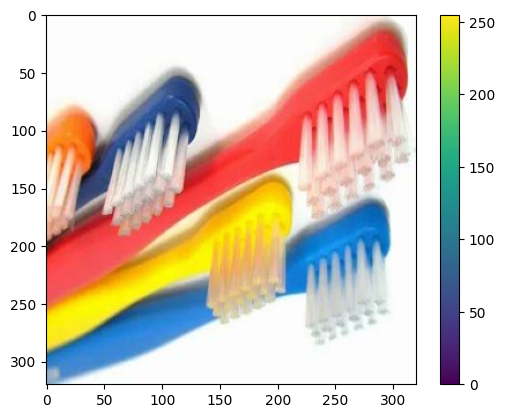

In [5]:
plt.figure()
plt.imshow(x_train[1312])
plt.colorbar()
plt.grid(False)

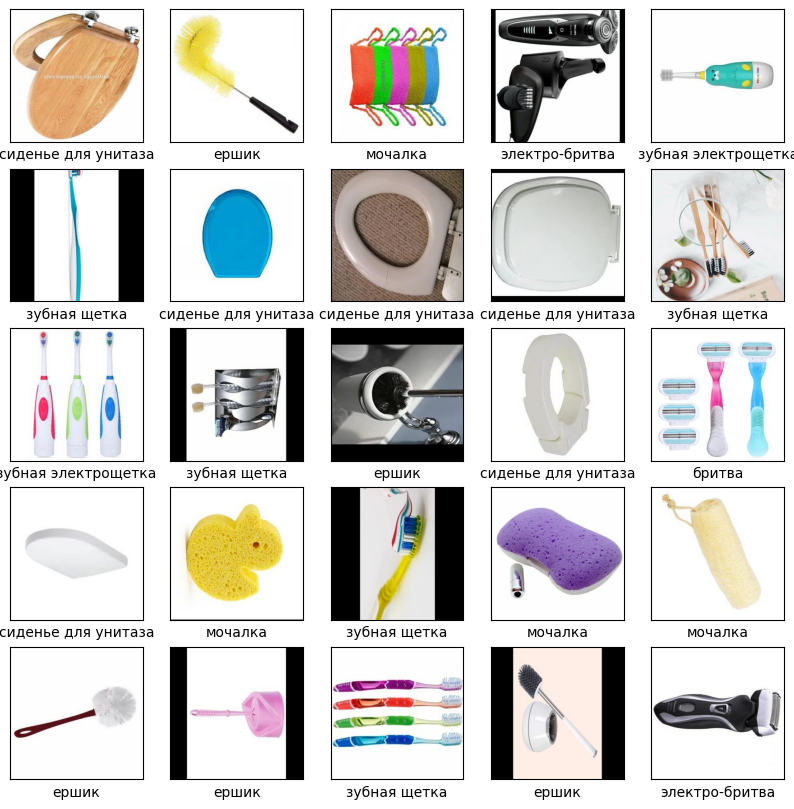

In [6]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

Text(0.5, 0, 'сиденье для унитаза')

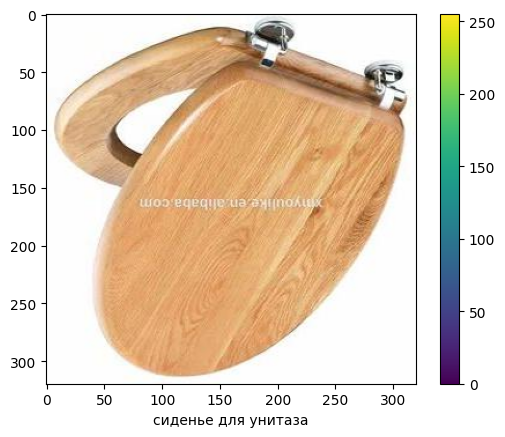

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[y_train[0]])

In [10]:
print(x_train[0].shape)

(320, 320, 3)


In [5]:
x_train = x_train/ 255
x_test = x_test/ 255

In [34]:
input_shape = (320, 320, 3)

# Загрузка модели ResNet-50
base_model = keras.applications.ResNet50(include_top=False, input_shape=input_shape)

In [35]:
# Создание модели, включающей модель ResNet-50 и дополнительные слои
model = keras.Sequential([
    base_model,
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 flatten_3 (Flatten)         (None, 204800)            0         
                                                                 
 dense_6 (Dense)             (None, 1024)              209716224 
                                                                 
 dense_7 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 233,311,111
Trainable params: 233,257,991
Non-trainable params: 53,120
_________________________________________________________________


In [39]:
batch_size = 32
num_epochs = 5
total_samples = x_train.shape[0]
num_batches = total_samples // batch_size

# Обучение модели
for epoch in range(num_epochs):
    
    epoch_time = datetime.datetime.now()
    
    for batch in range(num_batches):
        start_idx = batch * batch_size
        end_idx = start_idx + batch_size
        x_batch = x_train[start_idx:end_idx]
        y_batch = y_train[start_idx:end_idx]
        loss, accuracy = model.train_on_batch(x_batch, y_batch)
    if(accuracy>0.85):
            model.save(f'3pk_third_{epoch}_model.h5')
             
    print("Epoch:", epoch+1, "Loss:", loss, "Accuracy:", accuracy, "Epoch begin:", epoch_time)

ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_3/resnet50/pool1_pad/Pad' defined at (most recent call last):
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Admin\AppData\Local\Temp\ipykernel_13136\825551104.py", line 16, in <module>
      loss, accuracy = model.train_on_batch(x_batch, y_batch)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2381, in train_on_batch
      logs = self.train_function(iterator)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\layers\reshaping\zero_padding2d.py", line 149, in call
      return backend.spatial_2d_padding(
    File "C:\Users\Admin\Miniconda3\envs\tf\lib\site-packages\keras\backend.py", line 4031, in spatial_2d_padding
      return tf.compat.v1.pad(x, pattern)
Node: 'sequential_3/resnet50/pool1_pad/Pad'
OOM when allocating tensor with shape[2048,162,162] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_3/resnet50/pool1_pad/Pad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_252829]

In [22]:
batch_size = 32
total_samples = x_test.shape[0]
num_batches = total_samples // batch_size
for batch in range(num_batches):
    start_idx = batch * batch_size
    end_idx = start_idx + batch_size
    x_batch = x_test[start_idx:end_idx]
    y_batch = y_test[start_idx:end_idx]
    loss, accuracy = model.test_on_batch(x_batch, y_batch)

print("Test result:", "Loss:", loss, "Accuracy:", accuracy)

Test result: Loss: 1.07112717628479 Accuracy: 0.625


In [23]:
model.save('3pk_second_model.h5')